# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Request Weather Data on each city in list cities
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
city_name = []
city_lat = []
city_temp = []
city_humidity = []
city_wind_speed = []
city_cloudiness = []

#Use try/except code to skip broken url's

for city in cities:
    try:
        query_url = base_url + city + "&appid=" + weather_api_key
        weather_response = requests.get(query_url).json()
        city_name.append(weather_response["name"])
        city_lat.append(weather_response["coord"]["lat"])
        city_temp.append(weather_response["main"]["temp"])
        city_humidity.append(weather_response["main"]["humidity"])
        city_wind_speed.append(weather_response["wind"]["speed"])
        city_cloudiness.append(weather_response["clouds"]["all"])
        print(f"Retrieving {city} weather data")
    except:
        print(f"City not found.  Skipping and going to next city.")
    pass

    



Retrieving atuona weather data
City not found.  Skipping and going to next city.
Retrieving brae weather data
Retrieving rikitea weather data
Retrieving namie weather data
Retrieving ushuaia weather data
Retrieving shahrud weather data
Retrieving albany weather data
City not found.  Skipping and going to next city.
Retrieving torbay weather data
Retrieving kupang weather data
Retrieving khatanga weather data
Retrieving chokurdakh weather data
Retrieving poum weather data
Retrieving avarua weather data
Retrieving guiguinto weather data
Retrieving charters towers weather data
Retrieving butaritari weather data
Retrieving busselton weather data
Retrieving husavik weather data
Retrieving saint george weather data
Retrieving hilo weather data
Retrieving new milford weather data
Retrieving coahuayana weather data
Retrieving castro weather data
Retrieving new norfolk weather data
Retrieving yanam weather data
Retrieving hobart weather data
Retrieving port alfred weather data
Retrieving port e

Retrieving plettenberg bay weather data
City not found.  Skipping and going to next city.
City not found.  Skipping and going to next city.
Retrieving mogapi weather data
Retrieving marsa matruh weather data
Retrieving tateyama weather data
Retrieving talnakh weather data
Retrieving berdigestyakh weather data
Retrieving miguelopolis weather data
Retrieving angoram weather data
Retrieving port hardy weather data
Retrieving kamenskiy weather data
Retrieving hambantota weather data
Retrieving kudahuvadhoo weather data
Retrieving te anau weather data
Retrieving newport weather data
Retrieving vestmannaeyjar weather data
Retrieving sayyan weather data
Retrieving acapulco weather data
Retrieving hay river weather data
Retrieving wanning weather data
Retrieving fallon weather data
Retrieving paita weather data
Retrieving conde weather data
Retrieving tezu weather data
Retrieving pueblo nuevo weather data
City not found.  Skipping and going to next city.
Retrieving odesskoye weather data
Retri

Retrieving kisangani weather data
City not found.  Skipping and going to next city.
Retrieving aswan weather data
Retrieving kuli weather data
Retrieving kargat weather data
Retrieving mahebourg weather data
Retrieving boshnyakovo weather data
Retrieving waingapu weather data
Retrieving tazovskiy weather data
Retrieving sangar weather data
Retrieving bandarbeyla weather data
Retrieving souillac weather data
Retrieving omboue weather data
Retrieving neuquen weather data
Retrieving stykkisholmur weather data
Retrieving abha weather data
Retrieving mirnyy weather data
Retrieving owando weather data
Retrieving vao weather data
Retrieving harwich weather data
Retrieving fomboni weather data
Retrieving manbij weather data
Retrieving viedma weather data
Retrieving andra weather data
Retrieving carnarvon weather data
Retrieving zaranj weather data
City not found.  Skipping and going to next city.
Retrieving russell weather data
Retrieving katherine weather data
Retrieving floro weather data
Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Convert City Weather Data into Dictionary
city_dict = {
    "City Name": city_name,
    "Latitude": city_lat,
    "Temperature": city_temp,
    "Humidity": city_humidity,
    "Wind Speed": city_wind_speed,
    "Cloudiness": city_cloudiness
            }

In [5]:
#Convert City Dictionary into a Dataframe
city_df = pd.DataFrame(city_dict)
city_df.head()

,City Name,Latitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Atuona,-9.80,299.15,76,7.62,12
1,Brae,60.40,282.15,81,6.70,37
2,Rikitea,-23.12,298.58,67,1.69,4
3,Namie,37.48,274.82,69,2.35,56
4,Ushuaia,-54.80,278.15,93,14.40,75


In [6]:
#Save City Dataframe as a CSV File in output_data directory
city_df.to_csv("output_data/cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Check for cities with Humidity over 100%
humid_check_df = city_df[city_df["Humidity"] > 100]
len(humid_check_df)

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

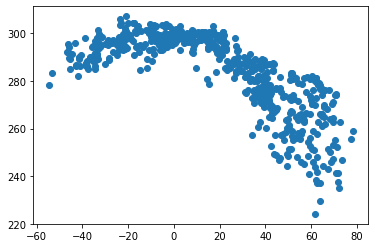

In [8]:
#Plot City Latitude vs. City Temperature and Save as PNG File
plt.scatter(city_df["Latitude"], city_df["Temperature"], marker = "o")
plt.savefig("output_data/latitude_temperature.png")
plt.show()

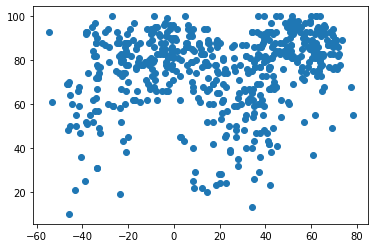

In [9]:
#Plot City Latitude vs. City Humidity and save as PNG File
plt.scatter(city_df["Latitude"], city_df["Humidity"], marker = "o")
plt.savefig("output_data/latitude_humidity.png")
plt.show()

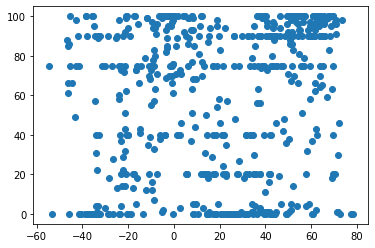

In [10]:
#Plot City Latitude vs. City Cloudiness and save as PNG File
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], marker = "o")
plt.savefig("output_data/latitude_cloudiness.png")
plt.show()

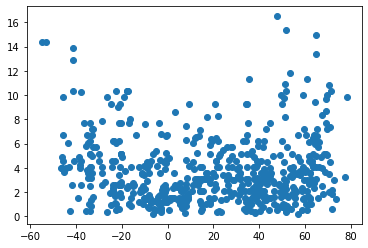

In [11]:
#Plot City Latitude vs. City Windspeed and save as PNG File
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], marker = "o")
plt.savefig("output_data/latitude_windspeed.png")
plt.show()

Linear Regression

In [15]:
#Create Northern Hemisphere Dataframe
northern_df = city_df[city_df["Latitude"] >= 0]
northern_df.head()

,City Name,Latitude,Temperature,Humidity,Wind Speed,Cloudiness
1,Brae,60.40,282.15,81,6.70,37
3,Namie,37.48,274.82,69,2.35,56
5,Shahrud,36.42,273.69,81,0.41,100
6,Albany,42.60,269.49,38,1.34,40
7,Torbay,47.67,273.18,88,16.50,75


In [16]:
#Create Southern Hemisphere Dataframe
southern_df = city_df[city_df["Latitude"] < 0]
southern_df.head()

,City Name,Latitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Atuona,-9.80,299.15,76,7.62,12
2,Rikitea,-23.12,298.58,67,1.69,4
4,Ushuaia,-54.80,278.15,93,14.40,75
8,Kupang,-10.17,300.15,94,1.50,75
11,Poum,-20.23,299.74,70,2.83,0


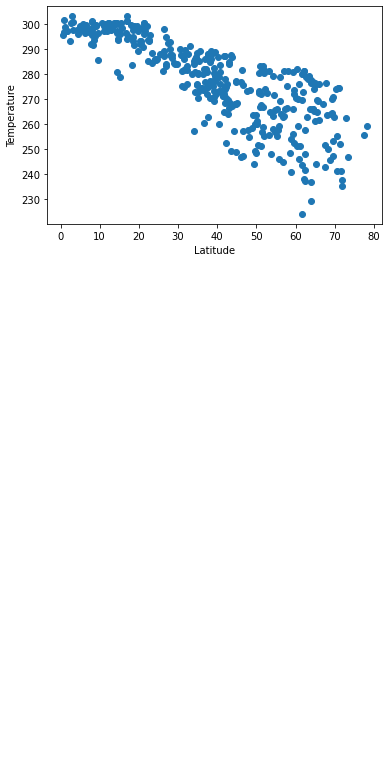

In [18]:
#Northern Hemisphere - Temperature vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

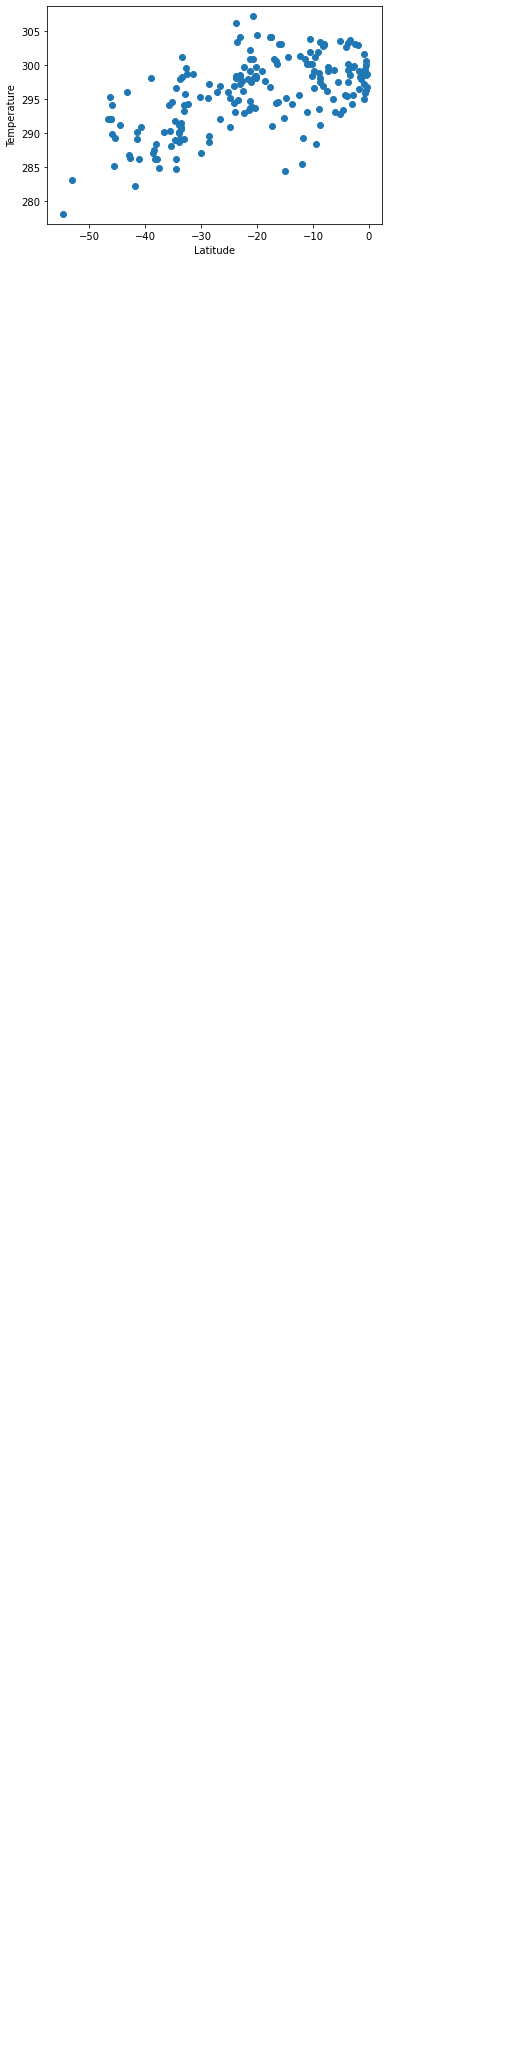

In [19]:
#Southern Hemisphere - Temperature vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

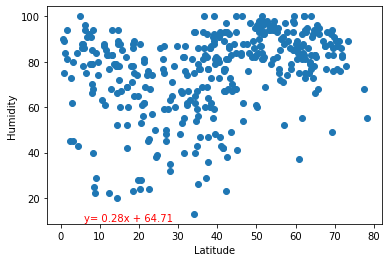

In [20]:
#Northern Hemishere - Humidity vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

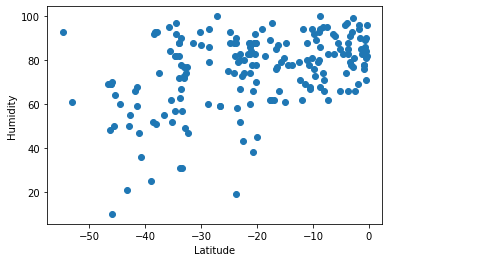

In [21]:
#Southern Hemishere - Humidity vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

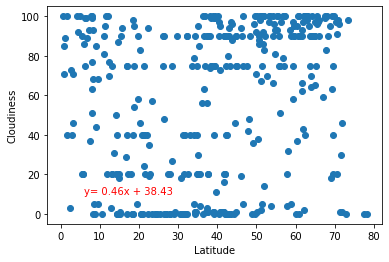

In [22]:
#Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

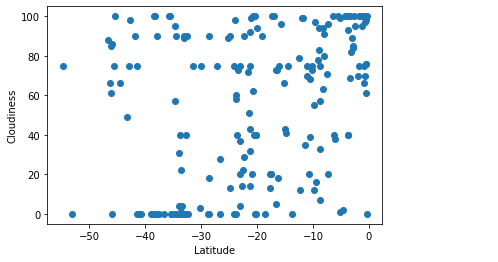

In [23]:
#Southern Hemisphere - Cloudiness vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

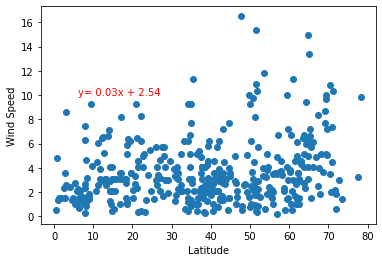

In [24]:
#Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

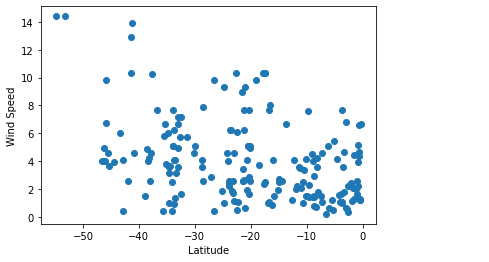

In [25]:
#Southern Hemisphere - Wind Speed vs. Latitude Linear Regression
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()